In [8]:
pip install tensorflow opencv-python mediapipe sklearn matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [8]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
draw_landmarks(frame, results)

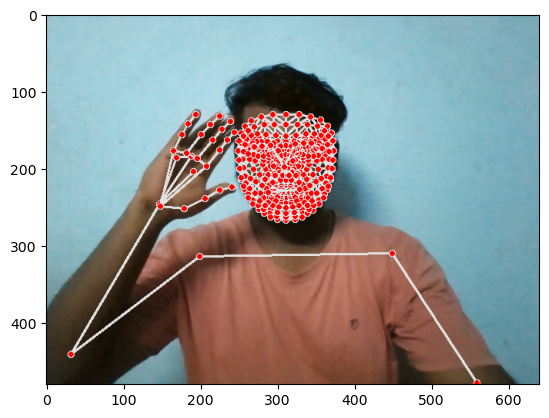

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [16]:
len(results.left_hand_landmarks.landmark)

21

In [17]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [18]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [26]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [6]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [7]:
result_test = extract_keypoints(results)

NameError: name 'results' is not defined

In [8]:
result_test

NameError: name 'result_test' is not defined

In [46]:
np.save('0', result_test)

In [47]:
np.load('0.npy')

array([ 0.43635315,  0.54803103, -0.71205938, ...,  0.        ,
        0.        ,  0.        ])

In [9]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou','sorry'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [10]:
for action in actions: 
    
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [14]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):
                
                # Read feed
                ret, frame = cap.read()
                
                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                print(results)
                
                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    
                    # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                # Show to screen
                cv2.imshow('OpenCV Feed', image)
                
                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [61]:
cap.release()
cv2.destroyAllWindows()

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [12]:
label_map = {label:num for num, label in enumerate(actions)}

In [13]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2, 'sorry': 3}

In [14]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [15]:
np.array(sequences).shape

(120, 30, 1662)

In [16]:
np.array(labels).shape

(120,)

In [17]:
X = np.array(sequences)

In [18]:
X.shape

(120, 30, 1662)

In [19]:
y = to_categorical(labels).astype(int)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [21]:
y_test.shape

(6, 4)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [23]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [34]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [35]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [28]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
4/4 [==============================] - 1s 216ms/step - loss: 10.1170 - categorical_accuracy: 0.2895
Epoch 2/2000
4/4 [==============================] - 1s 187ms/step - loss: 12.4718 - categorical_accuracy: 0.2456
Epoch 3/2000
4/4 [==============================] - 1s 208ms/step - loss: 11.1039 - categorical_accuracy: 0.2632
Epoch 4/2000
4/4 [==============================] - 1s 240ms/step - loss: 6.6227 - categorical_accuracy: 0.2632
Epoch 5/2000
4/4 [==============================] - 1s 220ms/step - loss: 5.6501 - categorical_accuracy: 0.2807
Epoch 6/2000
4/4 [==============================] - 1s 233ms/step - loss: 4.1557 - categorical_accuracy: 0.2807
Epoch 7/2000
4/4 [==============================] - 1s 230ms/step - loss: 3.9614 - categorical_accuracy: 0.2719
Epoch 8/2000
4/4 [==============================] - 1s 220ms/step - loss: 2.9646 - categorical_accuracy: 0.2281
Epoch 9/2000
4/4 [==============================] - 1s 189ms/step - loss: 2.2363 - categorical_accura

4/4 [==============================] - 1s 224ms/step - loss: 1.3819 - categorical_accuracy: 0.5088
Epoch 74/2000
4/4 [==============================] - 1s 217ms/step - loss: 1.1905 - categorical_accuracy: 0.5789
Epoch 75/2000
4/4 [==============================] - 1s 235ms/step - loss: 0.9100 - categorical_accuracy: 0.6228
Epoch 76/2000
4/4 [==============================] - 1s 221ms/step - loss: 0.8376 - categorical_accuracy: 0.7018
Epoch 77/2000
4/4 [==============================] - 1s 239ms/step - loss: 0.8068 - categorical_accuracy: 0.6140
Epoch 78/2000
4/4 [==============================] - 1s 247ms/step - loss: 0.9608 - categorical_accuracy: 0.6228
Epoch 79/2000
4/4 [==============================] - 1s 219ms/step - loss: 0.7334 - categorical_accuracy: 0.7018
Epoch 80/2000
4/4 [==============================] - 1s 229ms/step - loss: 0.7368 - categorical_accuracy: 0.7193
Epoch 81/2000
4/4 [==============================] - 1s 225ms/step - loss: 0.7149 - categorical_accuracy: 0.71

4/4 [==============================] - 1s 224ms/step - loss: 0.3986 - categorical_accuracy: 0.8596
Epoch 146/2000
4/4 [==============================] - 1s 216ms/step - loss: 0.4563 - categorical_accuracy: 0.8509
Epoch 147/2000
4/4 [==============================] - 1s 224ms/step - loss: 0.4605 - categorical_accuracy: 0.8509
Epoch 148/2000
4/4 [==============================] - 1s 230ms/step - loss: 0.4995 - categorical_accuracy: 0.8158
Epoch 149/2000
4/4 [==============================] - 1s 219ms/step - loss: 0.5475 - categorical_accuracy: 0.8509
Epoch 150/2000
4/4 [==============================] - 1s 214ms/step - loss: 0.5085 - categorical_accuracy: 0.7807
Epoch 151/2000
4/4 [==============================] - 1s 236ms/step - loss: 0.5172 - categorical_accuracy: 0.7982
Epoch 152/2000
4/4 [==============================] - 1s 219ms/step - loss: 0.4911 - categorical_accuracy: 0.8070
Epoch 153/2000
4/4 [==============================] - 1s 217ms/step - loss: 0.4822 - categorical_accura

Epoch 217/2000
4/4 [==============================] - 1s 206ms/step - loss: 1.0039 - categorical_accuracy: 0.5789
Epoch 218/2000
4/4 [==============================] - 1s 215ms/step - loss: 0.9489 - categorical_accuracy: 0.6053
Epoch 219/2000
4/4 [==============================] - 1s 224ms/step - loss: 0.8252 - categorical_accuracy: 0.6930
Epoch 220/2000
4/4 [==============================] - 1s 234ms/step - loss: 0.8865 - categorical_accuracy: 0.6491
Epoch 221/2000
4/4 [==============================] - 1s 233ms/step - loss: 0.9837 - categorical_accuracy: 0.5526
Epoch 222/2000
4/4 [==============================] - 1s 221ms/step - loss: 0.8070 - categorical_accuracy: 0.6842
Epoch 223/2000
4/4 [==============================] - 1s 228ms/step - loss: 0.6898 - categorical_accuracy: 0.7807
Epoch 224/2000
4/4 [==============================] - 1s 226ms/step - loss: 0.6746 - categorical_accuracy: 0.7544
Epoch 225/2000
4/4 [==============================] - 1s 210ms/step - loss: 0.6562 - cat

4/4 [==============================] - 1s 180ms/step - loss: 0.3969 - categorical_accuracy: 0.8596
Epoch 289/2000
4/4 [==============================] - 1s 171ms/step - loss: 0.4252 - categorical_accuracy: 0.8421
Epoch 290/2000
4/4 [==============================] - 1s 185ms/step - loss: 0.4143 - categorical_accuracy: 0.8333
Epoch 291/2000
4/4 [==============================] - 1s 199ms/step - loss: 0.4079 - categorical_accuracy: 0.8246
Epoch 292/2000
4/4 [==============================] - 1s 164ms/step - loss: 0.4414 - categorical_accuracy: 0.8509
Epoch 293/2000
4/4 [==============================] - 1s 195ms/step - loss: 0.8206 - categorical_accuracy: 0.7719
Epoch 294/2000
4/4 [==============================] - 1s 263ms/step - loss: 0.7873 - categorical_accuracy: 0.7281
Epoch 295/2000
4/4 [==============================] - 1s 219ms/step - loss: 0.7661 - categorical_accuracy: 0.6579
Epoch 296/2000
4/4 [==============================] - 1s 113ms/step - loss: 0.8561 - categorical_accura

4/4 [==============================] - 0s 111ms/step - loss: 0.5689 - categorical_accuracy: 0.7632
Epoch 361/2000
4/4 [==============================] - 0s 108ms/step - loss: 0.5473 - categorical_accuracy: 0.7895
Epoch 362/2000
4/4 [==============================] - 0s 100ms/step - loss: 0.5030 - categorical_accuracy: 0.8333
Epoch 363/2000
4/4 [==============================] - 0s 111ms/step - loss: 0.4231 - categorical_accuracy: 0.8333
Epoch 364/2000
4/4 [==============================] - 0s 100ms/step - loss: 0.4959 - categorical_accuracy: 0.8333
Epoch 365/2000
4/4 [==============================] - 0s 101ms/step - loss: 0.4167 - categorical_accuracy: 0.8509
Epoch 366/2000
4/4 [==============================] - 0s 101ms/step - loss: 0.4114 - categorical_accuracy: 0.8509
Epoch 367/2000
4/4 [==============================] - 0s 113ms/step - loss: 0.4633 - categorical_accuracy: 0.8333
Epoch 368/2000
4/4 [==============================] - 1s 140ms/step - loss: 0.4137 - categorical_accura

4/4 [==============================] - 0s 118ms/step - loss: 0.7471 - categorical_accuracy: 0.7368
Epoch 433/2000
4/4 [==============================] - 0s 110ms/step - loss: 0.6281 - categorical_accuracy: 0.7807
Epoch 434/2000
4/4 [==============================] - 0s 119ms/step - loss: 0.6148 - categorical_accuracy: 0.7895
Epoch 435/2000
4/4 [==============================] - 1s 124ms/step - loss: 0.5534 - categorical_accuracy: 0.7719
Epoch 436/2000
4/4 [==============================] - 0s 115ms/step - loss: 0.5866 - categorical_accuracy: 0.7719
Epoch 437/2000
4/4 [==============================] - 0s 122ms/step - loss: 0.6922 - categorical_accuracy: 0.7632
Epoch 438/2000
4/4 [==============================] - 1s 120ms/step - loss: 0.5528 - categorical_accuracy: 0.7632
Epoch 439/2000
4/4 [==============================] - 0s 121ms/step - loss: 0.5350 - categorical_accuracy: 0.7544
Epoch 440/2000
4/4 [==============================] - 0s 117ms/step - loss: 0.4999 - categorical_accura

4/4 [==============================] - 0s 125ms/step - loss: 1.5874 - categorical_accuracy: 0.3333
Epoch 505/2000
4/4 [==============================] - 0s 110ms/step - loss: 1.5316 - categorical_accuracy: 0.2368
Epoch 506/2000
4/4 [==============================] - 0s 105ms/step - loss: 1.4494 - categorical_accuracy: 0.2193
Epoch 507/2000
4/4 [==============================] - 0s 105ms/step - loss: 1.4860 - categorical_accuracy: 0.2719
Epoch 508/2000
4/4 [==============================] - 0s 115ms/step - loss: 1.5366 - categorical_accuracy: 0.2193
Epoch 509/2000
4/4 [==============================] - 0s 110ms/step - loss: 1.6971 - categorical_accuracy: 0.2807
Epoch 510/2000
4/4 [==============================] - 0s 105ms/step - loss: 1.6393 - categorical_accuracy: 0.2807
Epoch 511/2000
4/4 [==============================] - 0s 100ms/step - loss: 1.6103 - categorical_accuracy: 0.3947
Epoch 512/2000
4/4 [==============================] - 0s 110ms/step - loss: 1.7066 - categorical_accura

4/4 [==============================] - 0s 123ms/step - loss: 1.2961 - categorical_accuracy: 0.4211
Epoch 577/2000
4/4 [==============================] - 0s 114ms/step - loss: 1.2294 - categorical_accuracy: 0.4737
Epoch 578/2000
4/4 [==============================] - 0s 111ms/step - loss: 1.2148 - categorical_accuracy: 0.5088
Epoch 579/2000
4/4 [==============================] - 0s 107ms/step - loss: 1.2195 - categorical_accuracy: 0.4035
Epoch 580/2000
4/4 [==============================] - 0s 104ms/step - loss: 1.2100 - categorical_accuracy: 0.4386
Epoch 581/2000
4/4 [==============================] - 0s 110ms/step - loss: 1.1679 - categorical_accuracy: 0.4825
Epoch 582/2000
4/4 [==============================] - 0s 103ms/step - loss: 1.1489 - categorical_accuracy: 0.5000
Epoch 583/2000
4/4 [==============================] - 0s 112ms/step - loss: 1.1663 - categorical_accuracy: 0.4737
Epoch 584/2000
4/4 [==============================] - 0s 100ms/step - loss: 1.1559 - categorical_accura

4/4 [==============================] - 0s 105ms/step - loss: 0.8822 - categorical_accuracy: 0.6491
Epoch 649/2000
4/4 [==============================] - 0s 103ms/step - loss: 0.9235 - categorical_accuracy: 0.6228
Epoch 650/2000
4/4 [==============================] - 0s 105ms/step - loss: 0.9448 - categorical_accuracy: 0.5965
Epoch 651/2000
4/4 [==============================] - 0s 104ms/step - loss: 0.8839 - categorical_accuracy: 0.6491
Epoch 652/2000
4/4 [==============================] - 0s 115ms/step - loss: 0.9113 - categorical_accuracy: 0.6053
Epoch 653/2000
4/4 [==============================] - 0s 101ms/step - loss: 0.8839 - categorical_accuracy: 0.6491
Epoch 654/2000
4/4 [==============================] - 0s 125ms/step - loss: 0.8874 - categorical_accuracy: 0.6491
Epoch 655/2000
4/4 [==============================] - 1s 144ms/step - loss: 0.8903 - categorical_accuracy: 0.6228
Epoch 656/2000
4/4 [==============================] - 0s 122ms/step - loss: 0.8723 - categorical_accura

4/4 [==============================] - 0s 104ms/step - loss: 1.3998 - categorical_accuracy: 0.3246
Epoch 721/2000
4/4 [==============================] - 0s 102ms/step - loss: 1.4153 - categorical_accuracy: 0.4211
Epoch 722/2000
4/4 [==============================] - 0s 97ms/step - loss: 1.2769 - categorical_accuracy: 0.3246
Epoch 723/2000
4/4 [==============================] - 0s 103ms/step - loss: 1.2640 - categorical_accuracy: 0.4474
Epoch 724/2000
4/4 [==============================] - 0s 119ms/step - loss: 1.2179 - categorical_accuracy: 0.4123
Epoch 725/2000
4/4 [==============================] - 1s 147ms/step - loss: 1.1870 - categorical_accuracy: 0.4211
Epoch 726/2000
4/4 [==============================] - 1s 130ms/step - loss: 1.1659 - categorical_accuracy: 0.5263
Epoch 727/2000
4/4 [==============================] - 0s 105ms/step - loss: 1.2046 - categorical_accuracy: 0.4035
Epoch 728/2000
4/4 [==============================] - 0s 101ms/step - loss: 1.2118 - categorical_accurac

4/4 [==============================] - 0s 111ms/step - loss: 1.1876 - categorical_accuracy: 0.5000
Epoch 793/2000
4/4 [==============================] - 0s 102ms/step - loss: 1.2891 - categorical_accuracy: 0.4825
Epoch 794/2000
4/4 [==============================] - 0s 110ms/step - loss: 1.1627 - categorical_accuracy: 0.5351
Epoch 795/2000
4/4 [==============================] - 0s 109ms/step - loss: 1.1775 - categorical_accuracy: 0.5175
Epoch 796/2000
4/4 [==============================] - 0s 112ms/step - loss: 1.1747 - categorical_accuracy: 0.4649
Epoch 797/2000
4/4 [==============================] - 0s 119ms/step - loss: 1.1159 - categorical_accuracy: 0.4211
Epoch 798/2000
4/4 [==============================] - 0s 109ms/step - loss: 1.0717 - categorical_accuracy: 0.4474
Epoch 799/2000
4/4 [==============================] - 0s 115ms/step - loss: 1.0788 - categorical_accuracy: 0.5263
Epoch 800/2000
4/4 [==============================] - 0s 112ms/step - loss: 1.0600 - categorical_accura

Epoch 864/2000
4/4 [==============================] - 0s 118ms/step - loss: 0.8129 - categorical_accuracy: 0.6491
Epoch 865/2000
4/4 [==============================] - 0s 113ms/step - loss: 0.7854 - categorical_accuracy: 0.7018
Epoch 866/2000
4/4 [==============================] - 0s 116ms/step - loss: 0.8132 - categorical_accuracy: 0.6842
Epoch 867/2000
4/4 [==============================] - 0s 121ms/step - loss: 0.8130 - categorical_accuracy: 0.6667
Epoch 868/2000
4/4 [==============================] - 0s 110ms/step - loss: 0.7974 - categorical_accuracy: 0.7105
Epoch 869/2000
4/4 [==============================] - 1s 123ms/step - loss: 0.9082 - categorical_accuracy: 0.6316
Epoch 870/2000
4/4 [==============================] - 0s 114ms/step - loss: 0.8367 - categorical_accuracy: 0.6053
Epoch 871/2000
4/4 [==============================] - 0s 103ms/step - loss: 0.8363 - categorical_accuracy: 0.7018
Epoch 872/2000
4/4 [==============================] - 0s 112ms/step - loss: 0.8347 - cat

4/4 [==============================] - 0s 123ms/step - loss: 0.8467 - categorical_accuracy: 0.6404
Epoch 936/2000
4/4 [==============================] - 0s 115ms/step - loss: 0.7649 - categorical_accuracy: 0.6404
Epoch 937/2000
4/4 [==============================] - 0s 105ms/step - loss: 0.7612 - categorical_accuracy: 0.6579
Epoch 938/2000
4/4 [==============================] - 0s 123ms/step - loss: 0.7229 - categorical_accuracy: 0.6842
Epoch 939/2000
4/4 [==============================] - 0s 105ms/step - loss: 0.7451 - categorical_accuracy: 0.6754
Epoch 940/2000
4/4 [==============================] - 0s 123ms/step - loss: 0.6975 - categorical_accuracy: 0.7193
Epoch 941/2000
4/4 [==============================] - 0s 123ms/step - loss: 0.6913 - categorical_accuracy: 0.7018
Epoch 942/2000
4/4 [==============================] - 0s 118ms/step - loss: 0.7037 - categorical_accuracy: 0.7018
Epoch 943/2000
4/4 [==============================] - 0s 117ms/step - loss: 0.6381 - categorical_accura

Epoch 1007/2000
4/4 [==============================] - 0s 105ms/step - loss: 0.6206 - categorical_accuracy: 0.7632
Epoch 1008/2000
4/4 [==============================] - 0s 108ms/step - loss: 0.6108 - categorical_accuracy: 0.7544
Epoch 1009/2000
4/4 [==============================] - 0s 121ms/step - loss: 0.5878 - categorical_accuracy: 0.7895
Epoch 1010/2000
4/4 [==============================] - 0s 116ms/step - loss: 0.6718 - categorical_accuracy: 0.7368
Epoch 1011/2000
4/4 [==============================] - 0s 105ms/step - loss: 0.6101 - categorical_accuracy: 0.7281
Epoch 1012/2000
4/4 [==============================] - 1s 131ms/step - loss: 0.6819 - categorical_accuracy: 0.6930
Epoch 1013/2000
4/4 [==============================] - 0s 105ms/step - loss: 0.5461 - categorical_accuracy: 0.7895
Epoch 1014/2000
4/4 [==============================] - 0s 121ms/step - loss: 0.6027 - categorical_accuracy: 0.7544
Epoch 1015/2000
4/4 [==============================] - 1s 110ms/step - loss: 0.5

4/4 [==============================] - 0s 100ms/step - loss: 0.6037 - categorical_accuracy: 0.7281
Epoch 1079/2000
4/4 [==============================] - 0s 121ms/step - loss: 0.7297 - categorical_accuracy: 0.6930
Epoch 1080/2000
4/4 [==============================] - 0s 121ms/step - loss: 0.6492 - categorical_accuracy: 0.6667
Epoch 1081/2000
4/4 [==============================] - 0s 100ms/step - loss: 0.5985 - categorical_accuracy: 0.7719
Epoch 1082/2000
4/4 [==============================] - 1s 136ms/step - loss: 0.7334 - categorical_accuracy: 0.6579
Epoch 1083/2000
4/4 [==============================] - 0s 105ms/step - loss: 0.6414 - categorical_accuracy: 0.7105
Epoch 1084/2000
4/4 [==============================] - 0s 105ms/step - loss: 0.6408 - categorical_accuracy: 0.7544
Epoch 1085/2000
4/4 [==============================] - 1s 131ms/step - loss: 0.6622 - categorical_accuracy: 0.7105
Epoch 1086/2000
4/4 [==============================] - 1s 131ms/step - loss: 0.5977 - categorica

4/4 [==============================] - 1s 125ms/step - loss: 0.7672 - categorical_accuracy: 0.7193
Epoch 1150/2000
4/4 [==============================] - 0s 98ms/step - loss: 0.7544 - categorical_accuracy: 0.7105
Epoch 1151/2000
4/4 [==============================] - 0s 97ms/step - loss: 0.7542 - categorical_accuracy: 0.6579
Epoch 1152/2000
4/4 [==============================] - 0s 109ms/step - loss: 0.7097 - categorical_accuracy: 0.7544
Epoch 1153/2000
4/4 [==============================] - 0s 97ms/step - loss: 0.7669 - categorical_accuracy: 0.7281
Epoch 1154/2000
4/4 [==============================] - 0s 100ms/step - loss: 0.7638 - categorical_accuracy: 0.7018
Epoch 1155/2000
4/4 [==============================] - 0s 107ms/step - loss: 0.6897 - categorical_accuracy: 0.7193
Epoch 1156/2000
4/4 [==============================] - 0s 106ms/step - loss: 0.6637 - categorical_accuracy: 0.7193
Epoch 1157/2000
4/4 [==============================] - 0s 92ms/step - loss: 0.7810 - categorical_ac

4/4 [==============================] - 0s 107ms/step - loss: 0.5972 - categorical_accuracy: 0.7018
Epoch 1221/2000
4/4 [==============================] - 1s 126ms/step - loss: 0.5446 - categorical_accuracy: 0.7456
Epoch 1222/2000
4/4 [==============================] - 0s 110ms/step - loss: 0.5809 - categorical_accuracy: 0.7281
Epoch 1223/2000
4/4 [==============================] - 1s 117ms/step - loss: 0.7854 - categorical_accuracy: 0.6930
Epoch 1224/2000
4/4 [==============================] - 0s 105ms/step - loss: 0.8725 - categorical_accuracy: 0.6316
Epoch 1225/2000
4/4 [==============================] - 0s 118ms/step - loss: 0.7166 - categorical_accuracy: 0.6930
Epoch 1226/2000
4/4 [==============================] - 0s 102ms/step - loss: 0.6917 - categorical_accuracy: 0.7105
Epoch 1227/2000
4/4 [==============================] - 0s 110ms/step - loss: 0.6793 - categorical_accuracy: 0.7193
Epoch 1228/2000
4/4 [==============================] - 0s 101ms/step - loss: 0.5007 - categorica

4/4 [==============================] - 0s 115ms/step - loss: 0.7176 - categorical_accuracy: 0.6667
Epoch 1292/2000
4/4 [==============================] - 0s 104ms/step - loss: 0.6643 - categorical_accuracy: 0.7632
Epoch 1293/2000
4/4 [==============================] - 0s 100ms/step - loss: 0.6043 - categorical_accuracy: 0.7281
Epoch 1294/2000
4/4 [==============================] - 0s 110ms/step - loss: 0.6068 - categorical_accuracy: 0.7368
Epoch 1295/2000
4/4 [==============================] - 0s 100ms/step - loss: 0.5430 - categorical_accuracy: 0.7632
Epoch 1296/2000
4/4 [==============================] - 0s 116ms/step - loss: 0.5565 - categorical_accuracy: 0.7719
Epoch 1297/2000
4/4 [==============================] - 0s 100ms/step - loss: 0.5154 - categorical_accuracy: 0.8070
Epoch 1298/2000
4/4 [==============================] - 0s 100ms/step - loss: 0.6174 - categorical_accuracy: 0.7544
Epoch 1299/2000
4/4 [==============================] - 0s 100ms/step - loss: 0.5759 - categorica

4/4 [==============================] - 0s 113ms/step - loss: 0.4791 - categorical_accuracy: 0.8070
Epoch 1363/2000
4/4 [==============================] - 0s 105ms/step - loss: 0.4417 - categorical_accuracy: 0.8333
Epoch 1364/2000
4/4 [==============================] - 0s 113ms/step - loss: 0.4646 - categorical_accuracy: 0.7982
Epoch 1365/2000
4/4 [==============================] - 0s 102ms/step - loss: 0.4362 - categorical_accuracy: 0.8333
Epoch 1366/2000
4/4 [==============================] - 0s 121ms/step - loss: 0.4660 - categorical_accuracy: 0.8070
Epoch 1367/2000
4/4 [==============================] - 0s 109ms/step - loss: 0.4512 - categorical_accuracy: 0.7895
Epoch 1368/2000
4/4 [==============================] - 0s 107ms/step - loss: 0.4300 - categorical_accuracy: 0.8070
Epoch 1369/2000
4/4 [==============================] - 0s 108ms/step - loss: 0.5011 - categorical_accuracy: 0.7895
Epoch 1370/2000
4/4 [==============================] - 0s 101ms/step - loss: 0.6476 - categorica

4/4 [==============================] - 0s 100ms/step - loss: 0.4790 - categorical_accuracy: 0.7632
Epoch 1434/2000
4/4 [==============================] - 0s 105ms/step - loss: 0.4253 - categorical_accuracy: 0.8333
Epoch 1435/2000
4/4 [==============================] - 0s 110ms/step - loss: 0.4992 - categorical_accuracy: 0.7895
Epoch 1436/2000
4/4 [==============================] - 0s 94ms/step - loss: 0.6160 - categorical_accuracy: 0.7193
Epoch 1437/2000
4/4 [==============================] - 0s 100ms/step - loss: 0.6506 - categorical_accuracy: 0.7632
Epoch 1438/2000
4/4 [==============================] - 0s 94ms/step - loss: 0.6304 - categorical_accuracy: 0.6930
Epoch 1439/2000
4/4 [==============================] - 0s 99ms/step - loss: 0.7313 - categorical_accuracy: 0.7105
Epoch 1440/2000
4/4 [==============================] - 0s 110ms/step - loss: 0.6858 - categorical_accuracy: 0.6667
Epoch 1441/2000
4/4 [==============================] - 0s 105ms/step - loss: 0.6457 - categorical_a

4/4 [==============================] - 0s 100ms/step - loss: 0.3958 - categorical_accuracy: 0.8421
Epoch 1505/2000
4/4 [==============================] - 0s 115ms/step - loss: 0.4040 - categorical_accuracy: 0.8333
Epoch 1506/2000
4/4 [==============================] - 0s 105ms/step - loss: 0.4475 - categorical_accuracy: 0.7982
Epoch 1507/2000
4/4 [==============================] - 0s 121ms/step - loss: 0.3977 - categorical_accuracy: 0.8421
Epoch 1508/2000
4/4 [==============================] - 1s 131ms/step - loss: 0.4201 - categorical_accuracy: 0.8772
Epoch 1509/2000
4/4 [==============================] - 0s 110ms/step - loss: 0.4721 - categorical_accuracy: 0.7807
Epoch 1510/2000
4/4 [==============================] - 0s 105ms/step - loss: 0.4943 - categorical_accuracy: 0.7456
Epoch 1511/2000
4/4 [==============================] - 0s 99ms/step - loss: 0.4935 - categorical_accuracy: 0.7719
Epoch 1512/2000
4/4 [==============================] - 0s 115ms/step - loss: 0.4725 - categorical

4/4 [==============================] - 0s 113ms/step - loss: 0.4043 - categorical_accuracy: 0.8158
Epoch 1576/2000
4/4 [==============================] - 0s 100ms/step - loss: 0.4482 - categorical_accuracy: 0.7895
Epoch 1577/2000
4/4 [==============================] - 0s 100ms/step - loss: 0.3865 - categorical_accuracy: 0.8246
Epoch 1578/2000
4/4 [==============================] - 0s 94ms/step - loss: 0.3814 - categorical_accuracy: 0.8772
Epoch 1579/2000
4/4 [==============================] - 0s 100ms/step - loss: 0.4039 - categorical_accuracy: 0.8246
Epoch 1580/2000
4/4 [==============================] - 0s 121ms/step - loss: 0.3777 - categorical_accuracy: 0.8509
Epoch 1581/2000
4/4 [==============================] - 0s 116ms/step - loss: 0.3564 - categorical_accuracy: 0.8772
Epoch 1582/2000
4/4 [==============================] - 0s 115ms/step - loss: 0.3553 - categorical_accuracy: 0.8509
Epoch 1583/2000
4/4 [==============================] - 0s 109ms/step - loss: 0.3575 - categorical

4/4 [==============================] - 0s 117ms/step - loss: 0.4327 - categorical_accuracy: 0.8772
Epoch 1647/2000
4/4 [==============================] - 0s 91ms/step - loss: 0.4067 - categorical_accuracy: 0.8246
Epoch 1648/2000
4/4 [==============================] - 0s 119ms/step - loss: 0.2886 - categorical_accuracy: 0.8596
Epoch 1649/2000
4/4 [==============================] - 0s 110ms/step - loss: 0.2883 - categorical_accuracy: 0.9123
Epoch 1650/2000
4/4 [==============================] - 0s 105ms/step - loss: 0.2551 - categorical_accuracy: 0.9123
Epoch 1651/2000
4/4 [==============================] - 0s 117ms/step - loss: 0.2357 - categorical_accuracy: 0.9211
Epoch 1652/2000
4/4 [==============================] - 0s 99ms/step - loss: 0.2122 - categorical_accuracy: 0.9298
Epoch 1653/2000
4/4 [==============================] - 0s 93ms/step - loss: 0.2209 - categorical_accuracy: 0.9298
Epoch 1654/2000
4/4 [==============================] - 0s 93ms/step - loss: 0.2069 - categorical_ac

4/4 [==============================] - 0s 110ms/step - loss: 0.1377 - categorical_accuracy: 0.9386
Epoch 1718/2000
4/4 [==============================] - 0s 94ms/step - loss: 0.1559 - categorical_accuracy: 0.9737
Epoch 1719/2000
4/4 [==============================] - 0s 104ms/step - loss: 0.1938 - categorical_accuracy: 0.9386
Epoch 1720/2000
4/4 [==============================] - 0s 110ms/step - loss: 0.1819 - categorical_accuracy: 0.9298
Epoch 1721/2000
4/4 [==============================] - 0s 101ms/step - loss: 0.1089 - categorical_accuracy: 0.9649
Epoch 1722/2000
4/4 [==============================] - 0s 96ms/step - loss: 0.1537 - categorical_accuracy: 0.9649
Epoch 1723/2000
4/4 [==============================] - 0s 100ms/step - loss: 0.1467 - categorical_accuracy: 0.9474
Epoch 1724/2000
4/4 [==============================] - 0s 110ms/step - loss: 0.1382 - categorical_accuracy: 0.9474
Epoch 1725/2000
4/4 [==============================] - 0s 103ms/step - loss: 0.1242 - categorical_

4/4 [==============================] - 0s 127ms/step - loss: 0.0619 - categorical_accuracy: 0.9825
Epoch 1789/2000
4/4 [==============================] - 0s 105ms/step - loss: 0.0448 - categorical_accuracy: 0.9912
Epoch 1790/2000
4/4 [==============================] - 1s 126ms/step - loss: 0.0492 - categorical_accuracy: 0.9912
Epoch 1791/2000
4/4 [==============================] - 0s 106ms/step - loss: 0.0593 - categorical_accuracy: 0.9737
Epoch 1792/2000
4/4 [==============================] - 0s 122ms/step - loss: 0.0390 - categorical_accuracy: 0.9912
Epoch 1793/2000
4/4 [==============================] - 0s 94ms/step - loss: 0.0623 - categorical_accuracy: 0.9825
Epoch 1794/2000
4/4 [==============================] - 0s 110ms/step - loss: 0.0505 - categorical_accuracy: 0.9825
Epoch 1795/2000
4/4 [==============================] - 0s 100ms/step - loss: 0.0595 - categorical_accuracy: 0.9825
Epoch 1796/2000
4/4 [==============================] - 0s 110ms/step - loss: 0.0458 - categorical

4/4 [==============================] - 0s 100ms/step - loss: 0.2296 - categorical_accuracy: 0.9211
Epoch 1860/2000
4/4 [==============================] - 0s 113ms/step - loss: 0.2222 - categorical_accuracy: 0.9035
Epoch 1861/2000
4/4 [==============================] - 0s 95ms/step - loss: 0.1403 - categorical_accuracy: 0.9298
Epoch 1862/2000
4/4 [==============================] - 0s 101ms/step - loss: 0.0907 - categorical_accuracy: 0.9737
Epoch 1863/2000
4/4 [==============================] - 0s 94ms/step - loss: 0.1256 - categorical_accuracy: 0.9649
Epoch 1864/2000
4/4 [==============================] - 0s 131ms/step - loss: 0.1196 - categorical_accuracy: 0.9649
Epoch 1865/2000
4/4 [==============================] - 0s 100ms/step - loss: 0.0770 - categorical_accuracy: 0.9825
Epoch 1866/2000
4/4 [==============================] - 0s 95ms/step - loss: 0.1948 - categorical_accuracy: 0.9298
Epoch 1867/2000
4/4 [==============================] - 1s 138ms/step - loss: 0.0614 - categorical_a

4/4 [==============================] - 0s 120ms/step - loss: 0.0041 - categorical_accuracy: 1.0000
Epoch 1931/2000
4/4 [==============================] - 0s 103ms/step - loss: 0.0038 - categorical_accuracy: 1.0000
Epoch 1932/2000
4/4 [==============================] - 0s 116ms/step - loss: 0.0044 - categorical_accuracy: 1.0000
Epoch 1933/2000
4/4 [==============================] - 0s 132ms/step - loss: 0.0039 - categorical_accuracy: 1.0000
Epoch 1934/2000
4/4 [==============================] - 1s 146ms/step - loss: 0.0039 - categorical_accuracy: 1.0000
Epoch 1935/2000
4/4 [==============================] - 1s 121ms/step - loss: 0.0039 - categorical_accuracy: 1.0000
Epoch 1936/2000
4/4 [==============================] - 0s 106ms/step - loss: 0.0037 - categorical_accuracy: 1.0000
Epoch 1937/2000
4/4 [==============================] - 0s 105ms/step - loss: 0.0039 - categorical_accuracy: 1.0000
Epoch 1938/2000
4/4 [==============================] - 0s 108ms/step - loss: 0.0046 - categorica

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 596,708
Trainable params: 596,708
Non-trai

In [30]:
res = model.predict(X_test)

1/1 [==============================] - 2s 2s/step


In [31]:
actions[np.argmax(res[2])]

'iloveyou'

In [32]:
model.save('action.h5')

In [33]:
del model

In [36]:
model.load_weights('action.h5')

In [37]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [38]:
yhat = model.predict(X_train)

4/4 [==============================] - 1s 36ms/step


In [39]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [40]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[86,  0],
        [ 0, 28]],

       [[86,  0],
        [ 0, 28]],

       [[85,  0],
        [ 0, 29]],

       [[85,  0],
        [ 0, 29]]], dtype=int64)

In [41]:
accuracy_score(ytrue, yhat)

1.0

In [42]:
ytrue

[1,
 1,
 0,
 3,
 2,
 0,
 0,
 2,
 2,
 3,
 0,
 2,
 3,
 1,
 3,
 3,
 3,
 3,
 2,
 0,
 3,
 3,
 1,
 0,
 0,
 0,
 2,
 3,
 0,
 2,
 1,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 1,
 0,
 0,
 3,
 3,
 1,
 1,
 1,
 0,
 2,
 3,
 1,
 2,
 0,
 3,
 1,
 3,
 1,
 2,
 3,
 1,
 1,
 2,
 2,
 1,
 0,
 0,
 0,
 1,
 2,
 1,
 2,
 1,
 2,
 0,
 1,
 1,
 3,
 1,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 1,
 2,
 0,
 0,
 2,
 2,
 1,
 3,
 0,
 3,
 1,
 2,
 0,
 1,
 3,
 1,
 2,
 3,
 1,
 1,
 0,
 2,
 2,
 3,
 0]

In [43]:
yhat

[1,
 1,
 0,
 3,
 2,
 0,
 0,
 2,
 2,
 3,
 0,
 2,
 3,
 1,
 3,
 3,
 3,
 3,
 2,
 0,
 3,
 3,
 1,
 0,
 0,
 0,
 2,
 3,
 0,
 2,
 1,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 1,
 0,
 0,
 3,
 3,
 1,
 1,
 1,
 0,
 2,
 3,
 1,
 2,
 0,
 3,
 1,
 3,
 1,
 2,
 3,
 1,
 1,
 2,
 2,
 1,
 0,
 0,
 0,
 1,
 2,
 1,
 2,
 1,
 2,
 0,
 1,
 1,
 3,
 1,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 1,
 2,
 0,
 0,
 2,
 2,
 1,
 3,
 0,
 3,
 1,
 2,
 0,
 1,
 3,
 1,
 2,
 3,
 1,
 1,
 0,
 2,
 2,
 3,
 0]

In [44]:
from scipy import stats

In [45]:
colors = [(245,117,16), (117,245,16), (16,117,245),(22, 246, 250)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [50]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [46]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 31ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
sorry
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 11ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
sorry
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
sorry
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
sorry
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
sorry
<class 'mediapipe.p

1/1 [==============================] - 0s 17ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
thanks

1/1 [==============================] - 0s 17ms/step
sorry
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
sorry
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
sorry
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
sorry
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
sorry
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
sorry
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 16ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class '

1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 21ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 12ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
thanks
<class 'm

1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
iloveyou
<class 'm

1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.p

1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
hello
<class 'media

1/1 [==============================] - 0s 23ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
thanks
<clas

1/1 [==============================] - 0s 19ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
iloveyou
<

1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
hello
<class 'mediap

hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
sorry
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [============

In [22]:
cap.release()
cv2.destroyAllWindows()